In [2]:
# 8-15 January
import pandas as pd
import numpy as np
from io import StringIO


data = pd.read_csv('../datasets/2011.ehpcsv.txt')
data['time'] = pd.to_datetime(data['time'])

start_date = '2011-01-08'
end_date = '2011-01-15'
filtered_data = data[(data['time'] >= start_date) & (data['time'] <= end_date)] # By Date
filtered_data = filtered_data[filtered_data['place'].str.contains('Cobb', case=False, na=False)] # By Location
filtered_data.to_csv('../datasets/filtered_data.csv', index=False)


## FX Helper

In [2]:
import csv
def saveValidShapeletAsCsv(file='series_a', shapelets=[]):
    csv_file_path = f'{file}.csv'

    # Open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['shapelet', 'ig'])
        
        for entry in shapelets:
            shapelet = entry['shapelet']
            val_ig = entry['IG']
            shapelet_str = ', '.join(map(str, shapelet))
            writer.writerow([shapelet_str, val_ig])

    print(f"Data saved to {csv_file_path}")

def loadShapeletFromCsv(file='series_a'):
    csv_file_path = f'{file}.csv'
    shapelets = []

    # Open the CSV file in read mode
    with open(csv_file_path, mode='r') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            shapelet_str = row['shapelet']
            ig = float(row['ig'])  # Convert 'ig' to float
            shapelet = list(map(float, shapelet_str.split(', ')))  # Convert shapelet string back to list of floats
            shapelets.append({'shapelet': shapelet, 'IG': ig})
    
    return shapelets

In [3]:
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2011-01-08 06:02:38.930000+00:00,38.82433,-122.78883,0.798,0.89,d,7,223.0,1.0,0.06,...,2011-01-08T06:04:10.000Z,"Cobb, CA",eq,0.95,0.57,0.01,9,A,NC,NC
1,2011-01-08 06:15:37.280000+00:00,38.82217,-122.77866,-0.193,0.45,d,6,131.0,1.0,0.01,...,2011-01-08T06:17:10.000Z,"Cobb, CA",eq,0.30,0.75,0.06,8,A,NC,NC
2,2011-01-08 07:06:47.440000+00:00,38.84184,-122.79034,-0.832,0.43,d,5,163.0,3.0,0.01,...,2011-01-08T07:08:21.000Z,"Cobb, CA",eq,0.74,4.11,0.13,7,A,NC,NC
3,2011-01-08 07:31:32.160000+00:00,38.83567,-122.80550,0.214,0.38,d,8,68.0,1.0,0.03,...,2011-01-08T07:33:05.000Z,"Cobb, CA",eq,0.28,1.05,0.07,8,A,NC,NC
4,2011-01-08 12:00:34.180000+00:00,38.83800,-122.78400,1.540,1.18,d,57,82.0,1.0,0.07,...,2011-01-12T19:13:44.000Z,"Cobb, CA",eq,0.12,0.16,0.12,14,F,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2011-01-14 05:41:57.310000+00:00,38.83000,-122.80200,1.273,0.88,d,11,95.0,1.0,0.02,...,2011-01-14T05:43:31.000Z,"Cobb, CA",eq,0.36,0.48,0.03,13,A,NC,NC
67,2011-01-14 08:06:04.040000+00:00,38.83533,-122.78584,1.356,0.88,d,10,142.0,2.0,0.04,...,2011-01-14T08:07:36.000Z,"Cobb, CA",eq,0.34,0.59,0.08,11,A,NC,NC
68,2011-01-14 15:30:59.260000+00:00,38.83083,-122.79300,1.843,1.13,d,40,42.0,1.0,0.06,...,2011-01-14T21:04:53.000Z,"Cobb, CA",eq,0.16,0.21,0.12,8,F,NC,NC
69,2011-01-14 16:53:29.650000+00:00,38.83983,-122.82684,1.006,0.19,d,6,131.0,2.0,0.03,...,2011-01-14T16:55:02.000Z,"Cobb, CA",eq,0.49,0.74,0.11,7,A,NC,NC


In [4]:
filtered_data["status"].unique()

array(['A', 'F'], dtype=object)

In [5]:
filtered_data["type"].unique()

array(['eq'], dtype=object)

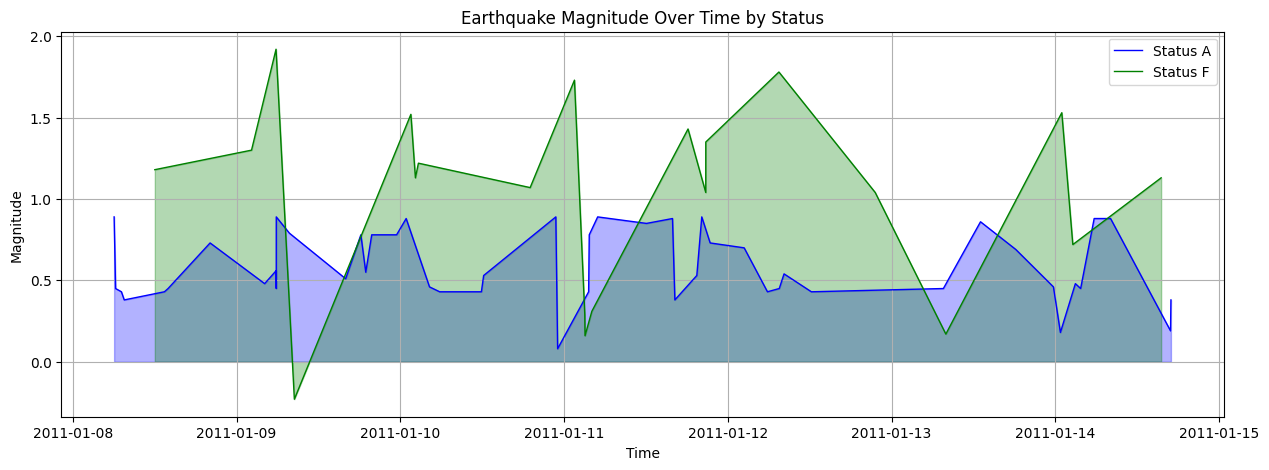

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

dataframe = filtered_data

dataframe['time'] = pd.to_datetime(dataframe['time'])
# dataframe = dataframe.sort_values(by='time')

data_A = dataframe[dataframe['status'] == 'A']
data_F = dataframe[dataframe['status'] == 'F']

# Plot the data
plt.figure(figsize=(15, 5))

# Plot data for status A
plt.plot(data_A['time'], data_A['mag'], color='blue', linewidth=1, label='Status A')
plt.fill_between(data_A['time'], data_A['mag'], color='blue', alpha=0.3)

# Plot data for status F
plt.plot(data_F['time'], data_F['mag'], color='green', linewidth=1, label='Status F')
plt.fill_between(data_F['time'], data_F['mag'], color='green', alpha=0.3)

plt.title('Earthquake Magnitude Over Time by Status')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.show()


In [7]:
dataframe[['time','mag','status']].head(15)

,time,mag,status
0,2011-01-08 06:02:38.930000+00:00,0.89,A
1,2011-01-08 06:15:37.280000+00:00,0.45,A
2,2011-01-08 07:06:47.440000+00:00,0.43,A
3,2011-01-08 07:31:32.160000+00:00,0.38,A
4,2011-01-08 12:00:34.180000+00:00,1.18,F
5,2011-01-08 13:24:23.170000+00:00,0.43,A
6,2011-01-08 13:24:55.950000+00:00,0.43,A
7,2011-01-08 13:57:12.200000+00:00,0.45,A
8,2011-01-08 20:06:40.920000+00:00,0.73,A
9,2011-01-09 02:11:03.640000+00:00,1.30,F


<Figure size 2500x500 with 0 Axes>

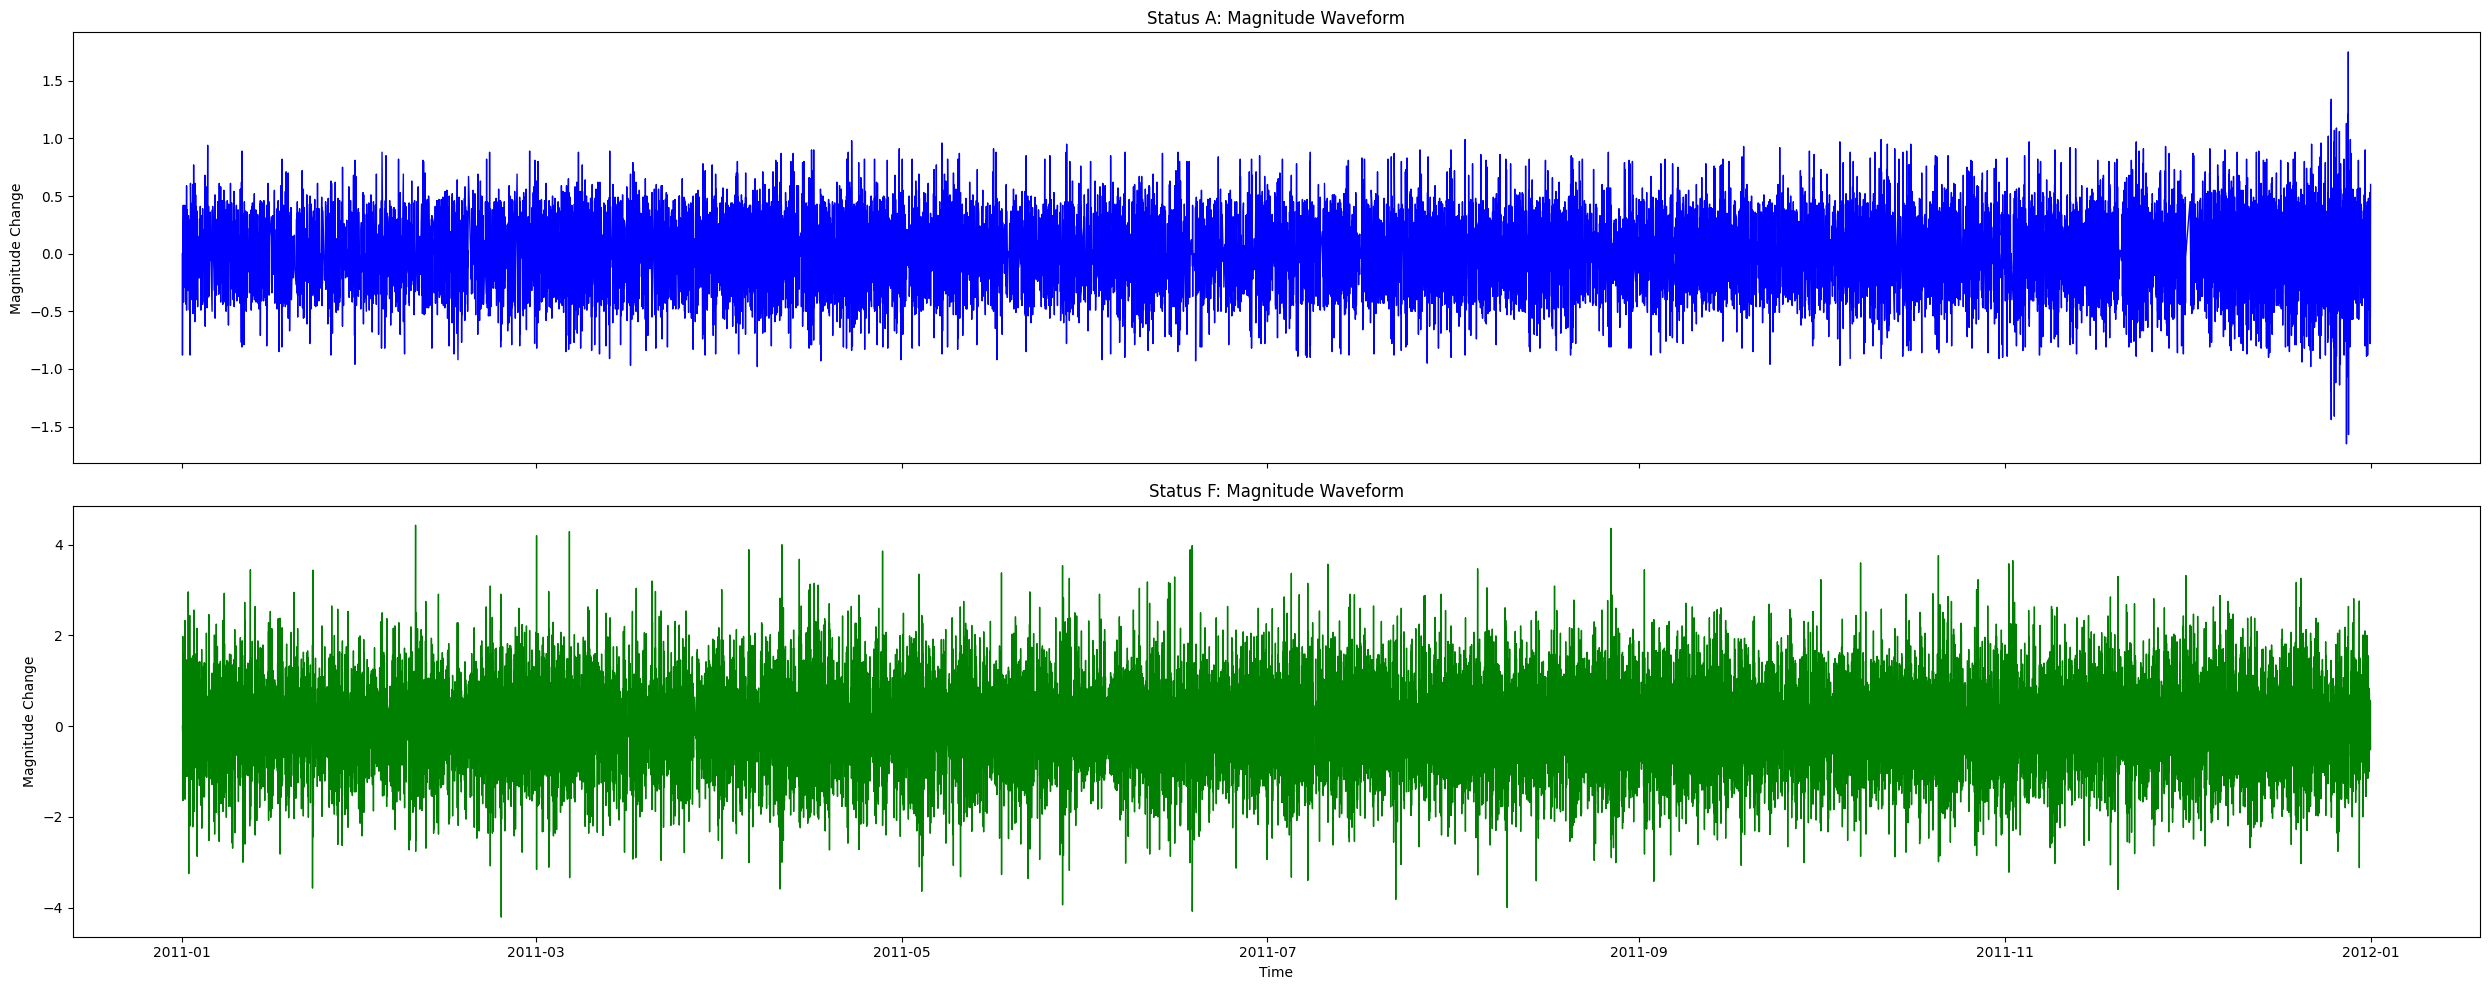

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
data['time'] = pd.to_datetime(data['time'])

# Split data by status
data_A = data[data['status'] == 'A'].copy()
data_F = data[data['status'] == 'F'].copy()

# magnitude_waveform
data_A['mag_wf'] = data_A['mag'].diff().fillna(0)
data_F['mag_wf'] = data_F['mag'].diff().fillna(0)

plt.figure(figsize=(25, 5))

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

# Plot status A
ax[0].plot(data_A['time'], data_A['mag_wf'], color='blue', linewidth=1)
ax[0].set_title('Status A: Magnitude Waveform')
ax[0].set_ylabel('Magnitude Change')
ax[0].grid(False)

# Plot status F
ax[1].plot(data_F['time'], data_F['mag_wf'], color='green', linewidth=1)
ax[1].set_title('Status F: Magnitude Waveform')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude Change')
ax[1].grid(False)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

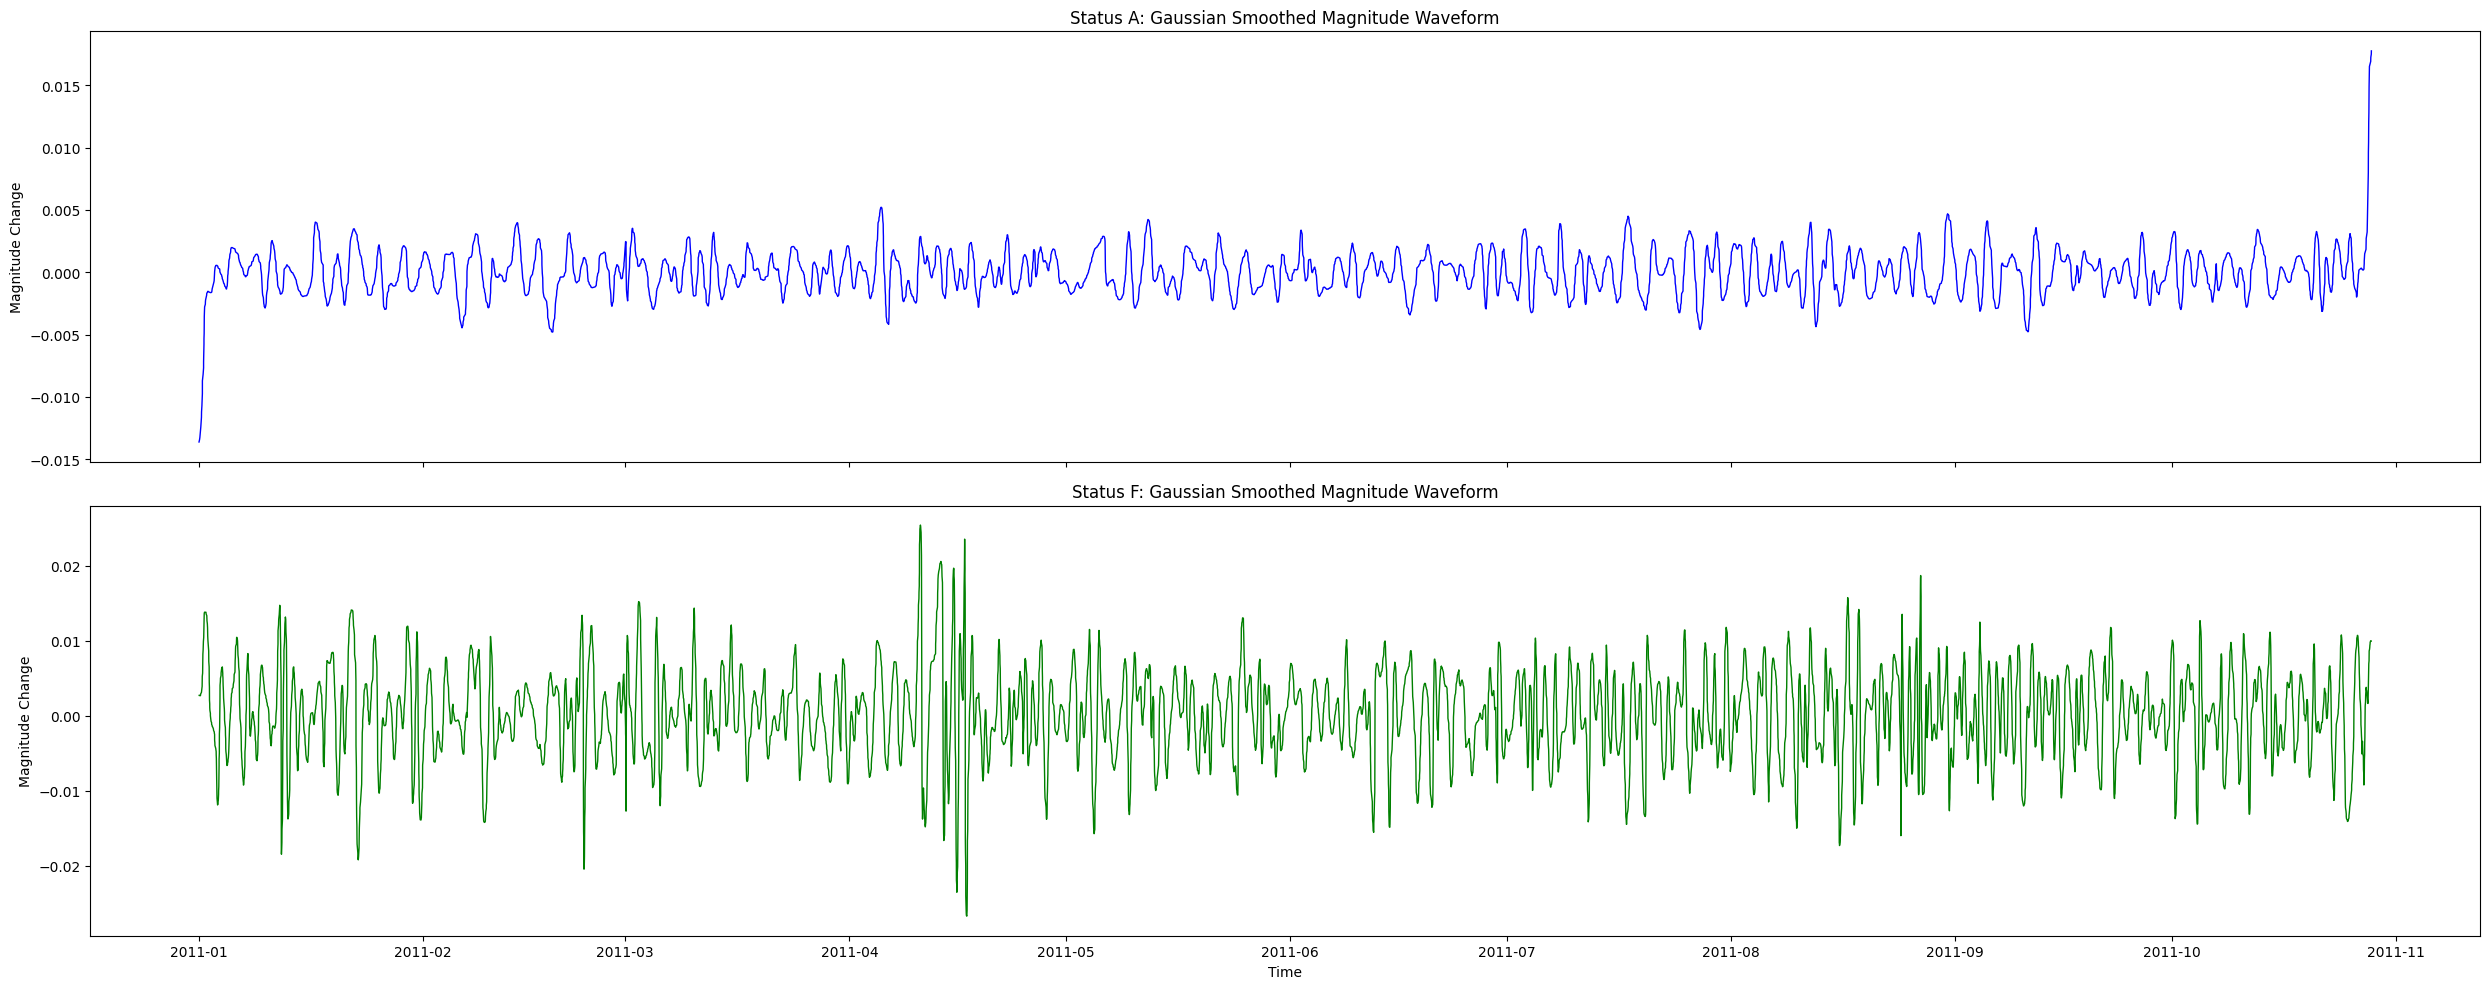

In [11]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

# Assuming 'data' is your DataFrame
data['time'] = pd.to_datetime(data['time'])

train_size = int(0.8 * len(data))

# train_df will contain 80% of the data in chronological order
# test_df will contain 20% of the data in chronological order

train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Split data by status
data_A = train_df[train_df['status'] == 'A'].copy()
data_F = train_df[train_df['status'] == 'F'].copy()

data_A['magnitude_waveform'] = data_A['mag'].diff().fillna(0)
data_F['magnitude_waveform'] = data_F['mag'].diff().fillna(0)

sigma = 15
data_A['gaussian_smoothed_waveform'] = gaussian_filter1d(data_A['magnitude_waveform'], sigma=sigma)
data_F['gaussian_smoothed_waveform'] = gaussian_filter1d(data_F['magnitude_waveform'], sigma=sigma)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

ax[0].plot(data_A['time'], data_A['gaussian_smoothed_waveform'], color='blue', linewidth=1)
ax[0].set_title('Status A: Gaussian Smoothed Magnitude Waveform')
ax[0].set_ylabel('Magnitude Change')
ax[0].grid(False)

ax[1].plot(data_F['time'], data_F['gaussian_smoothed_waveform'], color='green', linewidth=1)
ax[1].set_title('Status F: Gaussian Smoothed Magnitude Waveform')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude Change')
ax[1].grid(False)

plt.tight_layout()
plt.show()


In [12]:
ts1 = data_A[['time','gaussian_smoothed_waveform']].rename(columns={'gaussian_smoothed_waveform': 'mag_wf'})
ts2 = data_F[['time','gaussian_smoothed_waveform']].rename(columns={'gaussian_smoothed_waveform': 'mag_wf'})
display(ts1.head())
display(ts2.head())


,time,mag_wf
0,2011-01-01 00:21:06.570000+00:00,-0.013617
2,2011-01-01 00:58:13.270000+00:00,-0.013550
4,2011-01-01 02:04:41.480000+00:00,-0.013435
7,2011-01-01 03:11:04.720000+00:00,-0.013254
11,2011-01-01 04:07:14.660000+00:00,-0.013024


,time,mag_wf
1,2011-01-01 00:52:59.550000+00:00,0.002709
3,2011-01-01 01:44:16.230000+00:00,0.002714
5,2011-01-01 02:09:58.630000+00:00,0.002705
6,2011-01-01 02:53:49.640000+00:00,0.002697
8,2011-01-01 03:32:55.630000+00:00,0.002688


# Step 1 "Generate Shapelet Candidate":
---
We use 2 class from from the series that indicates as defined below:
- Type A: Attenuation Dominated (Low-Frequency) Ground Wave
- Type F: Field Strength Dominated (Higher-Frequency) Ground Wave

In [14]:
import pandas as pd
import numpy as np

def generate_shapelet_candidate(time_series, min_length=5, max_length=15, variance_threshold=0, debug=False):
    """
    Dynamically segment the time series into shapelet candidates based on variance.
    
    Parameters:
        time_series (np.array): The time series data.
        min_length (int): Minimum length of each segment.
        max_length (int): Maximum length of each segment.
        variance_threshold (float): Variance threshold for splitting segments.
        debug (bool): If True, print debug information about segment variances.
        
    Returns:
        list: A list of dynamically segmented shapelet candidates.
    """
    shapelet_candidates = []
    series_length = len(time_series)
    start_idx = 0

    while start_idx < series_length:
        segment_found = False

        for length in range(min_length, max_length + 1):
            end_idx = start_idx + length
            if end_idx > series_length:
                break
            segment = time_series[start_idx:end_idx]
            segment_variance = np.var(segment)

            if debug:
                print(f"Start: {start_idx}, End: {end_idx}, Segment: {segment}, Variance: {segment_variance}")

            # Split the segment if variance exceeds the threshold
            if segment_variance >= variance_threshold:
                shapelet_candidates.append(segment)
                start_idx = end_idx  # Move to the next segment
                segment_found = True
                break

        if not segment_found:
            start_idx += min_length

    if not shapelet_candidates and debug:
        print("No shapelet candidates found. Consider lowering the variance threshold or analyzing the data.")

    return shapelet_candidates

In [19]:
shapelet_candidates_A = generate_shapelet_candidate(
    ts1['mag_wf'].values, min_length=3, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_A)}")
for idx, candidate in enumerate(shapelet_candidates_A[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 3241
Shapelet 1: [-0.0136171  -0.01354996 -0.01343544]
Shapelet 2: [-0.0132541  -0.01302375 -0.01275131]
Shapelet 3: [-0.0124192  -0.01204024 -0.01163824]
Shapelet 4: [-0.0111903  -0.01072265 -0.0102387 ]
Shapelet 5: [-0.00973433 -0.00921964 -0.00870749]


In [16]:
shapelet_candidates_F = generate_shapelet_candidate(
    ts2['mag_wf'].values, min_length=5, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_F)}")
for idx, candidate in enumerate(shapelet_candidates_F[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 3387
Shapelet 1: [0.00270944 0.0027139  0.00270522 0.00269676 0.00268777]
Shapelet 2: [0.00270786 0.00267753 0.00269175 0.00269289 0.00270991]
Shapelet 3: [0.00273544 0.00276295 0.00282268 0.00291916 0.00300187]
Shapelet 4: [0.00311655 0.0032756  0.00344572 0.00365959 0.00391353]
Shapelet 5: [0.00417048 0.00450021 0.00484732 0.00525294 0.00566456]


## Step 2 "Calculate Shapelet Distance" & Step 3 "Assesment Shapelet Quality" & Step 4 "Discovery of Shapelet":

In [27]:
import numpy as np

def compute_shapelet_distances(shapelet, time_series):
    """
    Compute the squared Euclidean distance between a shapelet and all subsequences
    of the same length in the time series.
    """
    shapelet_length = len(shapelet)
    series_length = len(time_series)
    distances = []
    for start_idx in range(series_length - shapelet_length + 1):
        subsequence = time_series[start_idx:start_idx + shapelet_length]
        distance = np.sum((shapelet - subsequence) ** 2)  # Squared Euclidean Distance
        distances.append(distance)
    return np.array(distances)

def entropy(labels):
    """
    Calculate the entropy of a dataset.
    """
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    # Add small value to avoid log(0)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

def compute_information_gain(shapelet, time_series, labels):
    """
    Compute the Information Gain (IG) for a shapelet.
    """
    distances = compute_shapelet_distances(shapelet, time_series)
    total_size = len(distances)
    total_entropy = entropy(labels)  # H(T)
    
    print('now run:',shapelet)
    
    # Sort distances and labels
    sorted_indices = np.argsort(distances)
    sorted_labels = labels[sorted_indices]
    
    max_ig = 0
    
    for i in range(1, total_size):
        # Split the data at the current threshold
        T_x_labels = sorted_labels[:i]
        T_y_labels = sorted_labels[i:]
        
        # Calculate entropies of the subsets
        H_T_x = entropy(T_x_labels)
        H_T_y = entropy(T_y_labels)
        
        # Calculate the weighted average of subset entropies
        weighted_entropy = (len(T_x_labels) / total_size) * H_T_x + \
                           (len(T_y_labels) / total_size) * H_T_y
        
        # Calculate Information Gain
        ig = total_entropy - weighted_entropy
        
        # Track the maximum IG
        max_ig = max(max_ig, ig)
    
    return max_ig

In [28]:
valid_shapelets_A = []

labels = np.array([0, 1] * (len(ts1) // 2))[:len(ts1)]

for shapelet in shapelet_candidates_A:
    ig = compute_information_gain(shapelet, ts1['mag_wf'].values, labels)
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_A.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_A = np.array(valid_shapelets_A)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_A)}")
for idx, entry in enumerate(valid_shapelets_array_A[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")


now run: [-0.0136171  -0.01354996 -0.01343544]
now run: [-0.0132541  -0.01302375 -0.01275131]
now run: [-0.0124192  -0.01204024 -0.01163824]
now run: [-0.0111903  -0.01072265 -0.0102387 ]
now run: [-0.00973433 -0.00921964 -0.00870749]
now run: [-0.00818192 -0.00766872 -0.00716593]
now run: [-0.00667811 -0.006211   -0.00575424]
now run: [-0.00532248 -0.00491592 -0.00453576]
now run: [-0.00417627 -0.00384469 -0.00354072]
now run: [-0.0032601  -0.00300194 -0.0027736 ]
now run: [-0.00256188 -0.00238169 -0.00221527]
now run: [-0.00207311 -0.00194817 -0.00184808]
now run: [-0.00176159 -0.00168763 -0.0016354 ]
now run: [-0.00158848 -0.00156132 -0.00154338]
now run: [-0.00153162 -0.00153161 -0.00154196]
now run: [-0.00155363 -0.00157009 -0.00158676]
now run: [-0.00160204 -0.00161634 -0.00163034]
now run: [-0.00163289 -0.00163257 -0.0016252 ]
now run: [-0.00160536 -0.00157438 -0.00153084]
now run: [-0.0014777  -0.00141299 -0.00133364]
now run: [-0.0012444  -0.00114688 -0.00102973]
now run: [-0.

In [48]:
print('Candidate',len(shapelet_candidates_A))
print('Assesment',len(valid_shapelets_array_A))
print(valid_shapelets_array_A[0])
saveValidShapeletAsCsv('../output/shapelet/series_a', valid_shapelets_array_A)

Candidate 3241
Assesment 3241
{'shapelet': array([-0.0136171 , -0.01354996, -0.01343544]), 'IG': 0.00010286712647944452}
Data saved to series_a.csv


In [45]:
valid_shapelets_F = []

labels = np.array([0, 1] * (len(ts2) // 2))[:len(ts2)]

for shapelet in shapelet_candidates_F:
    ig = compute_information_gain(shapelet, ts2['mag_wf'].values, labels)  # Pass valid labels
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_F.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_F = np.array(valid_shapelets_F)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_F)}")
for idx, entry in enumerate(valid_shapelets_array_F[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")


now run: [0.00270944 0.0027139  0.00270522 0.00269676 0.00268777]
now run: [0.00270786 0.00267753 0.00269175 0.00269289 0.00270991]
now run: [0.00273544 0.00276295 0.00282268 0.00291916 0.00300187]
now run: [0.00311655 0.0032756  0.00344572 0.00365959 0.00391353]
now run: [0.00417048 0.00450021 0.00484732 0.00525294 0.00566456]
now run: [0.00614129 0.00661843 0.00713064 0.00766108 0.00821062]
now run: [0.00876667 0.00933381 0.00988175 0.01043084 0.01096564]
now run: [0.0114788  0.01194753 0.0123816  0.01277928 0.01312033]
now run: [0.01337149 0.01358542 0.01373384 0.01379119 0.01378358]
now run: [0.0137079  0.01355908 0.01333264 0.01303253 0.01265317]
now run: [0.01224707 0.01172426 0.0111888  0.01060907 0.00997873]
now run: [0.00930813 0.00863918 0.00794504 0.0072148  0.00650873]
now run: [0.00580961 0.0051141  0.00444435 0.00379529 0.00319228]
now run: [0.00261113 0.00207708 0.00156893 0.00111921 0.00070499]
now run: [ 3.26100795e-04 -3.34015325e-06 -2.86222149e-04 -5.35728248e-04
 -

In [ ]:
print('Candidate',len(shapelet_candidates_F))
print('Assesment',len(valid_shapelets_array_F))
print(valid_shapelets_array_F[0])
saveValidShapeletAsCsv('../output/shapelet/series_f', valid_shapelets_array_F)

In [11]:
valid_shapelets_array_A = loadShapeletFromCsv('../output/shapelet/series_a')
valid_shapelets_array_F = loadShapeletFromCsv('../output/shapelet/series_f')

Selecting shapelet within treshold

In [15]:
discover_A = [item for item in valid_shapelets_array_A if 0.001 <= item['IG'] <= 1]
discover_A = sorted(discover_A, key=lambda x: x['IG'], reverse=True)
display(len(discover_A))

12

In [14]:
discover_F = [item for item in valid_shapelets_array_F if 0.0005 <= item['IG'] <= 1]
discover_F = sorted(discover_F, key=lambda x: x['IG'], reverse=True)
display(len(discover_F))

16

# Step 5 "Shapelet Transform":

In [94]:
def visualizeShapeletTransform(label, data):
    combined_shapelets = np.concatenate([entry['shapelet'] for entry in data])
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(data)))
    plt.plot(combined_shapelets, color='black', linestyle='--', label='Combined Shapelets', alpha=0.7)

    start_idx = 0
    for idx, entry in enumerate(data):
        shapelet = entry['shapelet']
        length = len(shapelet)
        end_idx = start_idx + length
        plt.plot(range(start_idx, end_idx), shapelet, color=colors[idx], label=f'Shapelet {idx+1}', alpha=0.9, linewidth=2)
        start_idx = end_idx

    plt.title(f'Shapelet Transform {label}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

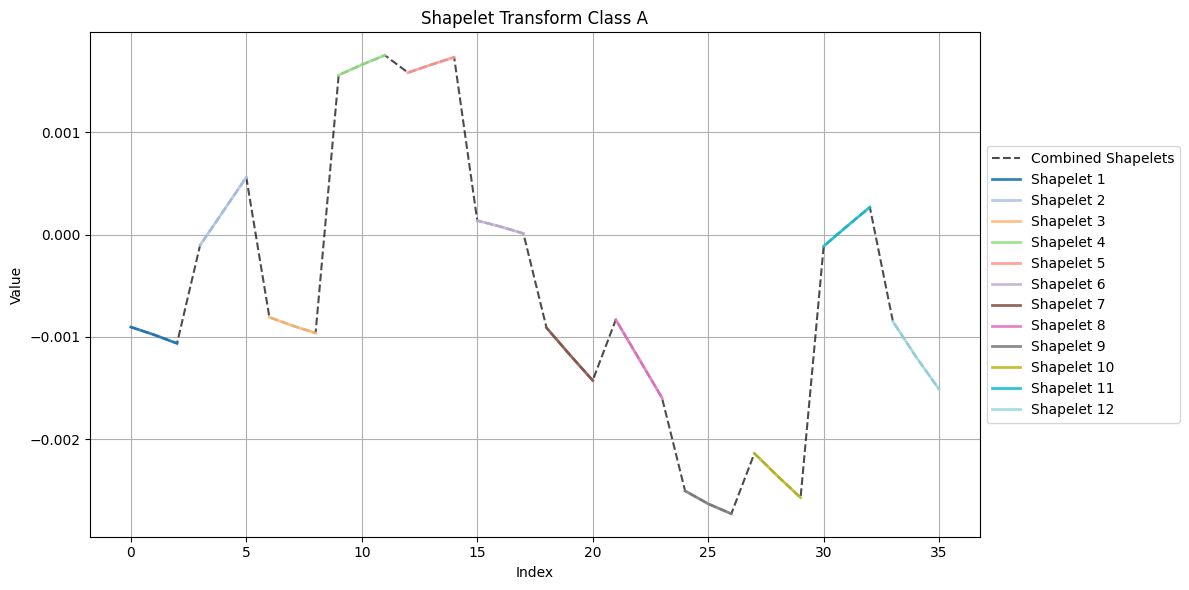

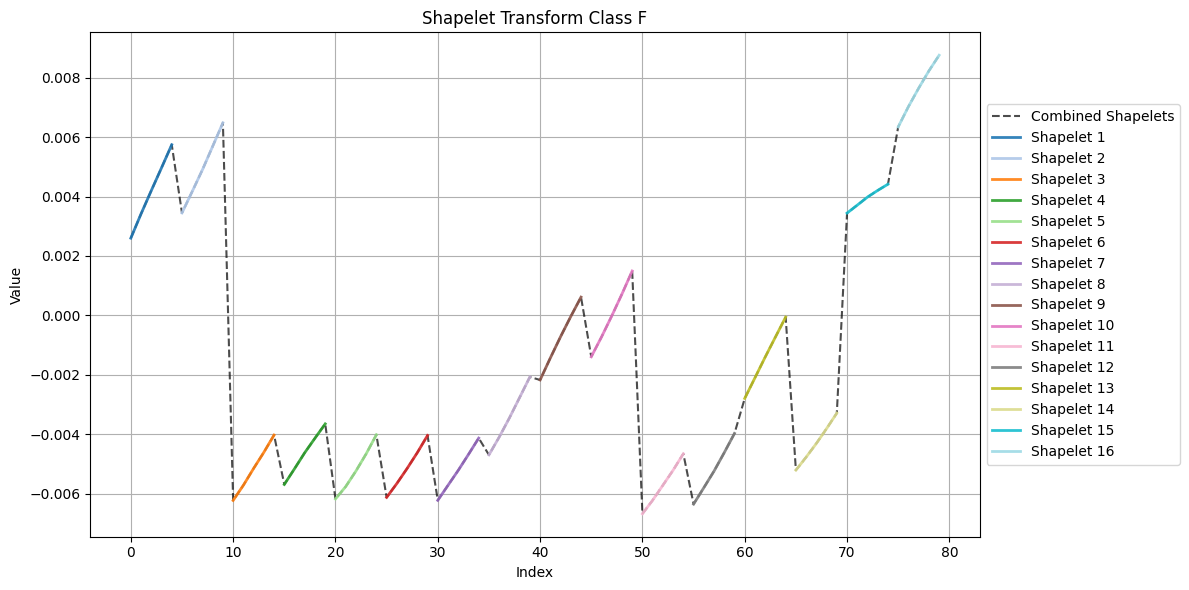

In [95]:
(visualizeShapeletTransform('Class A', discover_A))
(visualizeShapeletTransform('Class F', discover_F))

In [110]:
combined_shapelets_A = np.concatenate([entry['shapelet'] for entry in discover_A])
combined_shapelets_F = np.concatenate([entry['shapelet'] for entry in discover_F])

df_c_A = pd.DataFrame(combined_shapelets_A, columns=['mag'])
df_c_A.to_csv('../output/shapelet/combined_shapelets_A.csv', index=False)

df_c_F = pd.DataFrame(combined_shapelets_F, columns=['mag'])
df_c_F.to_csv('../output/shapelet/combined_shapelets_F.csv', index=False)


# Random Forest Classsification

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScale
r

# Step 2: Shapelet Distance Calculation (Squared Euclidean Distance)
def euclidean_distance_squared(x, y):
    """
    Compute the squared Euclidean distance between two time series subsequences.
    
    Parameters:
        x (np.array): First subsequence.
        y (np.array): Second subsequence.
        
    Returns:
        float: Squared Euclidean distance between subsequences x and y.
    """
    return np.sum((x - y) ** 2)

def calculate_distances_to_shapelet(time_series, shapelet):
    """
    Calculate the distance between each subsequence of the time series and the shapelet.
    
    Parameters:
        time_series (np.array): The time series data.
        shapelet (np.array): The shapelet to compare against.
        
    Returns:
        np.array: Array of distances between subsequences and the shapelet.
    """
    shapelet_len = len(shapelet)
    distances = [euclidean_distance_squared(time_series[i:i + shapelet_len], shapelet) 
                 for i in range(len(time_series) - shapelet_len + 1)]
    return np.array(distances)

# Step 3: Assessment of Shapelet Quality (Separation Ratio)
def assess_shapelet_quality(shapelet, time_series, labels=None):
    """
    Assess the quality of a shapelet using separation ratio (SR).
    
    Parameters:
        shapelet (np.array): The shapelet candidate.
        time_series (np.array): The time series data.
        labels (np.array or None): The class labels (if available).
        
    Returns:
        float: Quality score of the shapelet (higher is better).
    """
    shapelet_len = len(shapelet)
    subsequences = [time_series[i:i + shapelet_len] for i in range(len(time_series) - shapelet_len + 1)]
    
    distances = [euclidean_distance_squared(sub, shapelet) for sub in subsequences]
    
    if labels is not None:
        # Separate the distances into two classes
        class_0_distances = [distances[i] for i in range(len(labels)) if labels[i] == 0]
        class_1_distances = [distances[i] for i in range(len(labels)) if labels[i] == 1]
        
        # Calculate the means
        mean_0 = np.mean(class_0_distances)
        mean_1 = np.mean(class_1_distances)
        
        # Calculate the variances
        var_0 = np.var(class_0_distances)
        var_1 = np.var(class_1_distances)
        
        # Compute the separation ratio
        between_class_variance = (mean_0 - mean_1) ** 2
        within_class_variance = (var_0 + var_1) / 2
        
        if within_class_variance == 0:
            return 0  # Avoid division by zero
        return between_class_variance / within_class_variance
    else:
        # In unsupervised case, use other methods like clustering to evaluate the quality
        return np.mean(distances)  # Placeholder: we can use clustering techniques here

# Step 4: Discovery of Shapelet
def discover_best_shapelets(time_series, shapelet_candidates, labels=None, top_n=5):
    """
    Discover the best shapelets by evaluating their quality.
    
    Parameters:
        time_series (np.array): The time series data.
        shapelet_candidates (list): List of shapelet candidates.
        labels (np.array or None): The class labels (if available).
        top_n (int): Number of best shapelets to return.
        
    Returns:
        list: Top `n` shapelets based on their quality scores.
    """
    shapelet_scores = []
    
    for shapelet in shapelet_candidates:
        score = assess_shapelet_quality(shapelet, time_series, labels)
        shapelet_scores.append((shapelet, score))
    
    # Sort shapelets by quality score (higher score is better)
    shapelet_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Select the top_n shapelets
    best_shapelets = [shapelet for shapelet, score in shapelet_scores[:top_n]]
    
    return best_shapelets

# Step 5: Shapelet Transform
def shapelet_transform(time_series, best_shapelets):
    """
    Perform the shapelet transform on the time series data.
    
    Parameters:
        time_series (np.array): The time series data.
        best_shapelets (list): List of best shapelets to transform the data with.
        
    Returns:
        np.array: A transformed feature matrix.
    """
    transformed_features = []
    
    for shapelet in best_shapelets:
        distances = [euclidean_distance_squared(time_series[i:i + len(shapelet)], shapelet) 
                     for i in range(len(time_series) - len(shapelet) + 1)]
        transformed_features.append(distances)
    
    return np.array(transformed_features).T  # Return as a 2D array (samples x shapelets)

# Step 6: Classification Using Random Forest
def classify_with_random_forest(X, y):
    """
    Classify using Random Forest and evaluate performance.
    
    Parameters:
        X (np.array): The feature matrix (time series transformed with shapelets).
        y (np.array): The class labels (0: non-earthquake, 1: earthquake).
        
    Returns:
        None: Prints classification report.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = rf.predict(X_test)

    print(classification_report(y_test, y_pred))

In [ ]:
ts1_d = calculate_distances_to_shapelet(ts1, shapelet_candidates_A)

In [ ]:

# Step 2: Calculate Shapelet Distances (already incorporated during quality assessment)

# Step 3 & 4: Assess Shapelet Quality and Discover Best Shapelets
best_shapelets = discover_best_shapelets(time_series_data, shapelet_candidates, labels, top_n=5)

# Step 5: Shapelet Transform
X_transformed = shapelet_transform(time_series_data, best_shapelets)

# Step 6: Classification with Random Forest
classify_with_random_forest(X_transformed, labels)